In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')

In [2]:
# import csv as DF
df = pd.read_csv('../data/dataframe.csv')

In [3]:
df

,listing_id,property_name,address,mean_rent,mean_area,walkscore,cost/SF
0,p9c5ygt,Dobie Twenty21 Student Spaces,"2021-2025 Guadalupe St, Austin, TX 78705",1791.500000,434.750000,95,4.120759
1,rdsyjd0,The District on La Frontera,"2811 La Frontera Blvd, Austin, TX 78728",2130.714286,926.142857,12,2.300632
2,vsvz28g,Cliffs at Barton Creek,"3050 Tamarron Blvd, Austin, TX 78746",2585.545455,1079.772727,39,2.394527
3,pfzryrs,Radius On Grove,"2301 Grove Blvd, Austin, TX 78741",1604.000000,1042.500000,34,1.538609
4,lb7xscf,Chandelier,"2336 Douglas St, Austin, TX 78741",1274.333333,697.000000,47,1.828312
...,...,...,...,...,...,...,...
484,h9z6sd3,La Frontera Square Apartments,"2601 La Frontera Blvd, Round Rock, TX 78681",1141.000000,709.866667,53,1.607344
485,l8esygf,300 Bowie St Unit 2904,"Austin, TX 78703",1995.000000,565.000000,96,3.530973
486,w4ex40j,617 Peacock Ln,"Austin, TX 78704",2950.000000,1766.000000,60,1.670442
487,6vvhrpr,6500 Adair Dr,"Austin, TX 78754",1650.000000,1636.000000,3,1.008557


In [4]:
df['walkscore_category'] = ''

def ws_cat(df):
    str_cat = ''
    if df['walkscore'] >= 90: 
        str_cat = "Walker's Paradise"
    elif 90 > df['walkscore'] >= 70: 
        str_cat = "Very Walkable"
    elif 70 > df['walkscore'] >= 50: 
        str_cat = "Somewhat Walkable"
    elif 50 > df['walkscore'] >= 25:
        str_cat = "Car-Dependent_2"
    elif 25 > df['walkscore'] >= 0:
        str_cat = "Car-Dependent_1"
    return str_cat

def ws_cat_num(df):
    num_cat = 0
    if df['walkscore'] >= 90: 
        num_cat = 5
    elif 90 > df['walkscore'] >= 70: 
        num_cat = 4
    elif 70 > df['walkscore'] >= 50: 
        num_cat = 3
    elif 50 > df['walkscore'] >= 25:
        num_cat = 2
    elif 25 > df['walkscore'] >= 0:
        num_cat = 1
    return num_cat

def ws_group(df):
    result = ''
    if df['walkscore'] >= 70: 
        result = 'Walkscore >= 70'
    elif 90 > df['walkscore'] < 70: 
        result = 'Walkscore < 70'
    return result


df['walkscore_category'] = df.apply(ws_cat, axis=1)
df['walkscore_category_num'] = df.apply(ws_cat_num, axis=1)
df['walkscore_group'] = df.apply(ws_group, axis=1)


df

,listing_id,property_name,address,mean_rent,mean_area,walkscore,cost/SF,walkscore_category,walkscore_category_num,walkscore_group
0,p9c5ygt,Dobie Twenty21 Student Spaces,"2021-2025 Guadalupe St, Austin, TX 78705",1791.500000,434.750000,95,4.120759,Walker's Paradise,5,Walkscore >= 70
1,rdsyjd0,The District on La Frontera,"2811 La Frontera Blvd, Austin, TX 78728",2130.714286,926.142857,12,2.300632,Car-Dependent_1,1,Walkscore < 70
2,vsvz28g,Cliffs at Barton Creek,"3050 Tamarron Blvd, Austin, TX 78746",2585.545455,1079.772727,39,2.394527,Car-Dependent_2,2,Walkscore < 70
3,pfzryrs,Radius On Grove,"2301 Grove Blvd, Austin, TX 78741",1604.000000,1042.500000,34,1.538609,Car-Dependent_2,2,Walkscore < 70
4,lb7xscf,Chandelier,"2336 Douglas St, Austin, TX 78741",1274.333333,697.000000,47,1.828312,Car-Dependent_2,2,Walkscore < 70
...,...,...,...,...,...,...,...,...,...,...
484,h9z6sd3,La Frontera Square Apartments,"2601 La Frontera Blvd, Round Rock, TX 78681",1141.000000,709.866667,53,1.607344,Somewhat Walkable,3,Walkscore < 70
485,l8esygf,300 Bowie St Unit 2904,"Austin, TX 78703",1995.000000,565.000000,96,3.530973,Walker's Paradise,5,Walkscore >= 70
486,w4ex40j,617 Peacock Ln,"Austin, TX 78704",2950.000000,1766.000000,60,1.670442,Somewhat Walkable,3,Walkscore < 70
487,6vvhrpr,6500 Adair Dr,"Austin, TX 78754",1650.000000,1636.000000,3,1.008557,Car-Dependent_1,1,Walkscore < 70


In [5]:
# remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

mean_rent                 724.615385
mean_area                 220.000000
walkscore                  34.000000
cost/SF                     0.787042
walkscore_category_num      1.000000
dtype: float64


In [6]:
z_cost_sf = np.abs(stats.zscore(df['cost/SF']))
print(z_cost_sf)

[2.58497029e+00 3.83235673e-01 4.96816765e-01 5.38553541e-01
 1.88111736e-01 7.98931786e-02 9.87076571e-01 1.13342933e-01
 1.92923170e-02 3.45272595e-01 3.83490988e-01 1.96185475e-01
 3.20996125e-01 5.60035240e-01 1.29509139e+00 3.76167794e-01
 3.71407865e-01 8.03397817e-02 4.79315873e-01 1.01446464e+00
 4.37898848e-01 1.67910634e+00 1.49550640e+00 8.34907174e-01
 6.81826951e-01 4.09272227e-01 1.99021339e-01 1.61556252e-01
 5.31557580e-01 3.60585175e-01 8.89680860e-03 1.96317495e+00
 1.38138484e+00 3.69582884e-03 3.39761939e-01 1.20483656e+00
 7.30020050e-01 1.15177805e+00 7.86405058e-01 2.32505368e+00
 1.78477681e+00 8.13059635e-01 6.85896545e-01 1.44441180e+00
 1.78485956e-01 5.59193753e-01 8.97294867e-02 5.37054837e+00
 1.77222574e-01 3.89260696e-01 3.62013979e-02 6.46157256e-01
 1.11011937e+00 5.74944020e-01 1.27213695e+00 1.04180874e+00
 2.10517739e-01 7.06769333e-01 3.61760536e-01 3.35776482e-01
 1.73357535e-01 4.72381411e-01 3.68437982e-01 3.52207860e-01
 2.72268455e+00 9.852318

In [7]:
threshold = 3
outliers_cost_sf = np.where(z_cost_sf > threshold)
print(outliers_cost_sf)

(array([ 47,  89, 118, 213, 297, 399, 445]),)


In [8]:
df_result = df.copy()
for apt in outliers_cost_sf:
    df_result.drop(apt, inplace=True)

# dropped 7 outliers

In [9]:
df_no_outliers = df_result.copy()
df_no_outliers

,listing_id,property_name,address,mean_rent,mean_area,walkscore,cost/SF,walkscore_category,walkscore_category_num,walkscore_group
0,p9c5ygt,Dobie Twenty21 Student Spaces,"2021-2025 Guadalupe St, Austin, TX 78705",1791.500000,434.750000,95,4.120759,Walker's Paradise,5,Walkscore >= 70
1,rdsyjd0,The District on La Frontera,"2811 La Frontera Blvd, Austin, TX 78728",2130.714286,926.142857,12,2.300632,Car-Dependent_1,1,Walkscore < 70
2,vsvz28g,Cliffs at Barton Creek,"3050 Tamarron Blvd, Austin, TX 78746",2585.545455,1079.772727,39,2.394527,Car-Dependent_2,2,Walkscore < 70
3,pfzryrs,Radius On Grove,"2301 Grove Blvd, Austin, TX 78741",1604.000000,1042.500000,34,1.538609,Car-Dependent_2,2,Walkscore < 70
4,lb7xscf,Chandelier,"2336 Douglas St, Austin, TX 78741",1274.333333,697.000000,47,1.828312,Car-Dependent_2,2,Walkscore < 70
...,...,...,...,...,...,...,...,...,...,...
484,h9z6sd3,La Frontera Square Apartments,"2601 La Frontera Blvd, Round Rock, TX 78681",1141.000000,709.866667,53,1.607344,Somewhat Walkable,3,Walkscore < 70
485,l8esygf,300 Bowie St Unit 2904,"Austin, TX 78703",1995.000000,565.000000,96,3.530973,Walker's Paradise,5,Walkscore >= 70
486,w4ex40j,617 Peacock Ln,"Austin, TX 78704",2950.000000,1766.000000,60,1.670442,Somewhat Walkable,3,Walkscore < 70
487,6vvhrpr,6500 Adair Dr,"Austin, TX 78754",1650.000000,1636.000000,3,1.008557,Car-Dependent_1,1,Walkscore < 70


In [10]:
df_outliers = df.iloc[outliers_cost_sf]
df_outliers

,listing_id,property_name,address,mean_rent,mean_area,walkscore,cost/SF,walkscore_category,walkscore_category_num,walkscore_group
47,mdgjmyk,Mosaic at Mueller,"4600 Mueller Blvd, Austin, TX 78723",7224.680000,1124.720000,60,6.423537,Somewhat Walkable,3,Walkscore < 70
89,56q2bdm,Lenox Boardwalk,"2515 Elmont Dr, Austin, TX 78741",4916.437500,938.937500,64,5.236171,Somewhat Walkable,3,Walkscore < 70
118,msqgjkh,Burnet Flats,"5453 Burnet Rd, Austin, TX 78756",9178.818182,883.863636,83,10.384880,Very Walkable,4,Walkscore >= 70
213,cwx9gdf,SkyHouse Austin,"51 Rainey St, Austin, TX 78701",3210.000000,719.000000,88,4.464534,Very Walkable,4,Walkscore >= 70
297,5cz921n,Seven,"615 W 7th St, Austin, TX 78701",3957.347826,861.782609,97,4.592049,Walker's Paradise,5,Walkscore >= 70
399,j5v1qd5,Terrazzo,"8585 Spicewood Springs Rd, Austin, TX 78759",4311.875000,883.500000,52,4.880447,Somewhat Walkable,3,Walkscore < 70
445,hp1ncd2,Timbercreek Apartments,"614 S 1st St, Austin, TX 78704",3975.625000,788.875000,68,5.039613,Somewhat Walkable,3,Walkscore < 70


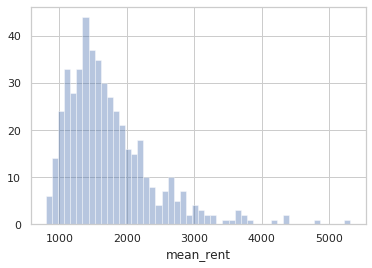

In [11]:
y = df_no_outliers['mean_rent']
sns.distplot(df_no_outliers['mean_rent'], bins=50, kde=False);

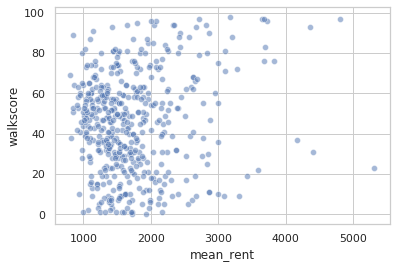

In [12]:
# scatter plot showing no correlation betwee rent and walkscore
sns.scatterplot(df_no_outliers['mean_rent'], df_no_outliers['walkscore'], alpha=.5)

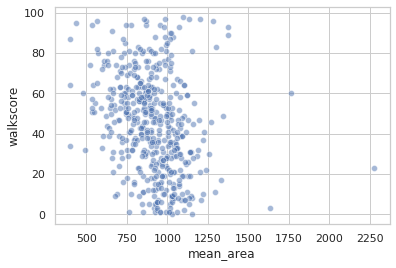

In [13]:
# scatter plot maybe showing very weak negative correlation between unit area and walkscore
sns.scatterplot(df_no_outliers['mean_area'], df_no_outliers['walkscore'], alpha=.5)

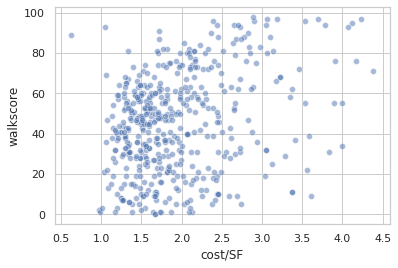

In [14]:
sns.scatterplot(df_no_outliers['cost/SF'], df_no_outliers['walkscore'], alpha=.5);

In [15]:
df_no_outliers['walkscore'] = pd.to_numeric(df_no_outliers['walkscore'])

In [16]:
type(df_no_outliers['walkscore'][0])

numpy.int64

In [17]:
df_walkscore = df_no_outliers[['mean_rent', 'mean_area', 'cost/SF', 'walkscore', 'walkscore_category', 'walkscore_category_num', 'walkscore_group']]
df_walkscore = df_walkscore.sort_values(by='walkscore_category')

In [18]:
df_walkscore

,mean_rent,mean_area,cost/SF,walkscore,walkscore_category,walkscore_category_num,walkscore_group
244,1603.428571,765.714286,2.094030,1,Car-Dependent_1,1,Walkscore < 70
106,1548.000000,955.500000,1.620094,15,Car-Dependent_1,1,Walkscore < 70
341,1070.000000,1100.000000,0.972727,2,Car-Dependent_1,1,Walkscore < 70
336,1560.586207,1031.103448,1.513511,9,Car-Dependent_1,1,Walkscore < 70
110,2856.000000,847.000000,3.371901,11,Car-Dependent_1,1,Walkscore < 70
...,...,...,...,...,...,...,...
79,2329.529412,956.882353,2.434499,94,Walker's Paradise,5,Walkscore >= 70
76,3642.763636,985.054545,3.698032,97,Walker's Paradise,5,Walkscore >= 70
383,1135.000000,660.000000,1.719697,91,Walker's Paradise,5,Walkscore >= 70
332,2426.200000,1024.800000,2.367486,90,Walker's Paradise,5,Walkscore >= 70


In [19]:
ws5_cost_sf = df[df['walkscore_category'] == "Walker's Paradise"]['cost/SF'] 
ws4_cost_sf = df[df['walkscore_category'] == "Very Walkable"]['cost/SF']
ws3_cost_sf = df[df['walkscore_category'] == "Somewhat Walkable"]['cost/SF']
ws2_cost_sf = df[df['walkscore_category'] == "Car-Dependent_2"]['cost/SF']
ws1_cost_sf = df[df['walkscore_category'] == "Car-Dependent_1"]['cost/SF']

In [20]:
# find group means
group_labels = ["Walker's Paradise", "Very Walkable", "Somewhat Walkable", "Car-Dependent_2", "Car-Dependent_1"]
groups_data = [ws5_cost_sf, ws4_cost_sf, ws3_cost_sf, ws2_cost_sf, ws1_cost_sf]
ws_dicts = {}

for label, data in zip(group_labels, groups_data):
    ws_dicts[label] = data
    print('mean for ', label, ': ', np.mean(ws_dicts[label]))
    print('count for ', label, ': ', len(ws_dicts[label]))

mean for  Walker's Paradise :  3.04572218057239
count for  Walker's Paradise :  21
mean for  Very Walkable :  2.442126047296325
count for  Very Walkable :  66
mean for  Somewhat Walkable :  1.9692111311736438
count for  Somewhat Walkable :  134
mean for  Car-Dependent_2 :  1.7798758918310666
count for  Car-Dependent_2 :  157
mean for  Car-Dependent_1 :  1.8165095521053183
count for  Car-Dependent_1 :  111


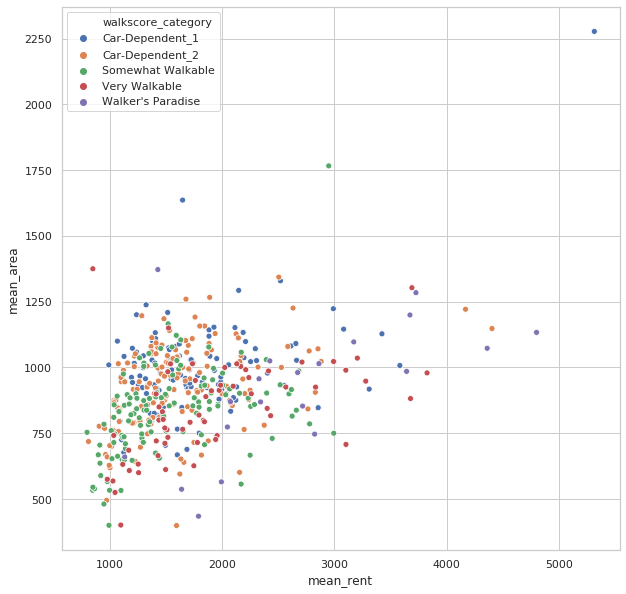

In [21]:
# '3d' scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='mean_rent', y='mean_area', data=df_walkscore, hue='walkscore_category');

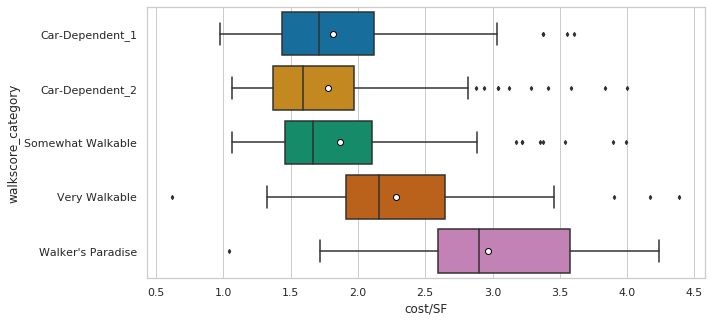

In [22]:
# box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='cost/SF', 
            y='walkscore_category', 
            data=df_walkscore, 
            orient='h', 
            fliersize=3, 
            palette='colorblind', 
            showmeans=True, 
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor": "black"});

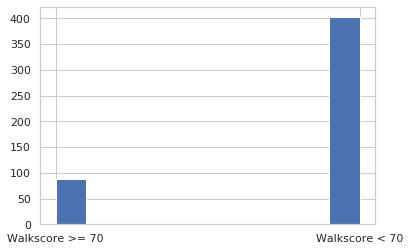

In [23]:
plt.hist(df['walkscore_group']);

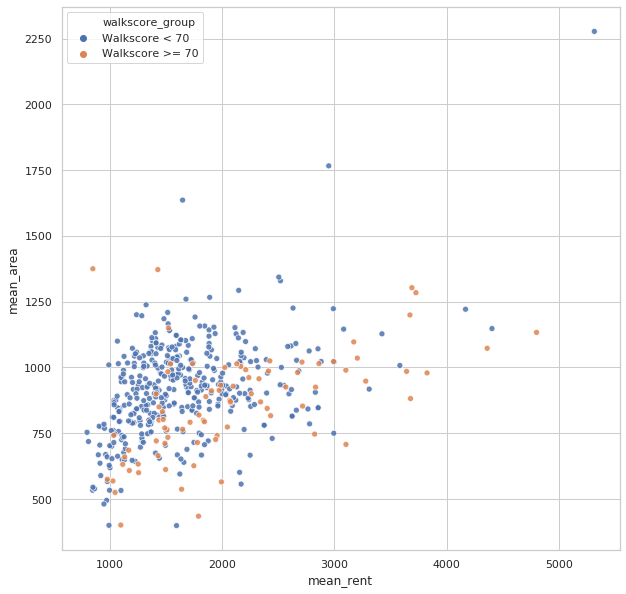

In [24]:
# '3d' scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(x='mean_rent', 
                y='mean_area', 
                data=df_walkscore, 
                hue='walkscore_group', 
                alpha=0.85);

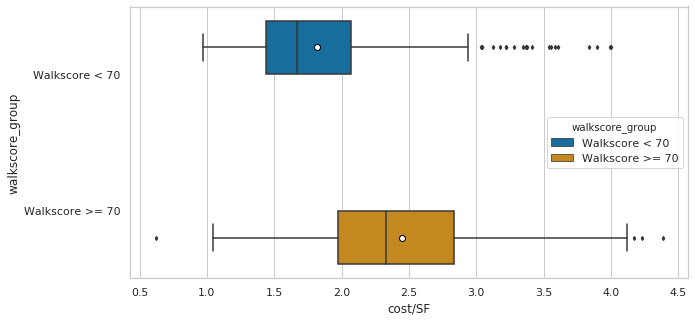

In [25]:
# box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='cost/SF', 
            y='walkscore_group', 
            data=df_walkscore, 
            orient='h', 
            fliersize=3, 
            palette='colorblind', hue='walkscore_group',
            showmeans=True, 
            meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor": "black"})
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [26]:
ws_gt_50 = df[df['walkscore'] >= 50]['cost/SF']
ws_lt_50 = df[df['walkscore'] < 50]['cost/SF']


In [27]:
# stats.f_oneway(ws5_cost_sf, ws4_cost_sf, ws3_cost_sf, ws2_cost_sf, ws1_cost_sf)
# stats.f_oneway(ws5_cost_sf, ws4_cost_sf.append([ws3_cost_sf, ws2_cost_sf, ws1_cost_sf]))

stats.f_oneway(ws_gt_50, ws_lt_50)

# stats.f_oneway(ws5_cost_sf.append([ws4_cost_sf, ws3_cost_sf]), ws2_cost_sf.append(ws1_cost_sf))
# stats.f_oneway(ws5_cost_sf.append([ws4_cost_sf, ws3_cost_sf, ws2_cost_sf]), ws1_cost_sf)

F_onewayResult(statistic=32.87279748744426, pvalue=1.7280447303151494e-08)

In [28]:
stats.ttest_ind(ws_gt_50, ws_lt_50)

Ttest_indResult(statistic=5.733480399150616, pvalue=1.728044730315011e-08)

## p-value of 1.728044730315011e-08 is much less than the significance level of 5%. We reject the null hypothesis. 